In [1]:
#1.Importazione librerie
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Impostazioni grafiche
plt.style.use("seaborn-v0_8")


In [2]:
# 2.Download dati storici da Yahoo Finance

# Lista di ticker 
tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA"]

# Scarico dati
data = yf.download(tickers, start="2018-01-01", end="2023-12-31")["Close"]


/tmp/ipykernel_6473/3135805777.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2018-01-01", end="2023-12-31")["Close"]
[*********************100%***********************]  5 of 5 completed


In [3]:
# 3.Calcolo rendimenti

# Rendimenti giornalieri
returns = data.pct_change().dropna()

# Rendimenti medi annualizzati
mean_returns = returns.mean() * 252

# Volatilità annualizzata
volatility = returns.std() * np.sqrt(252)

# Tabella riassuntiva
summary = pd.DataFrame({
    "Mean Return": mean_returns,
    "Volatility": volatility
})
summary


,Mean Return,Volatility
Ticker,,
AAPL,0.309906,0.316770
AMZN,0.219349,0.353664
GOOG,0.211479,0.312258
MSFT,0.303639,0.301239
TSLA,0.613040,0.637668


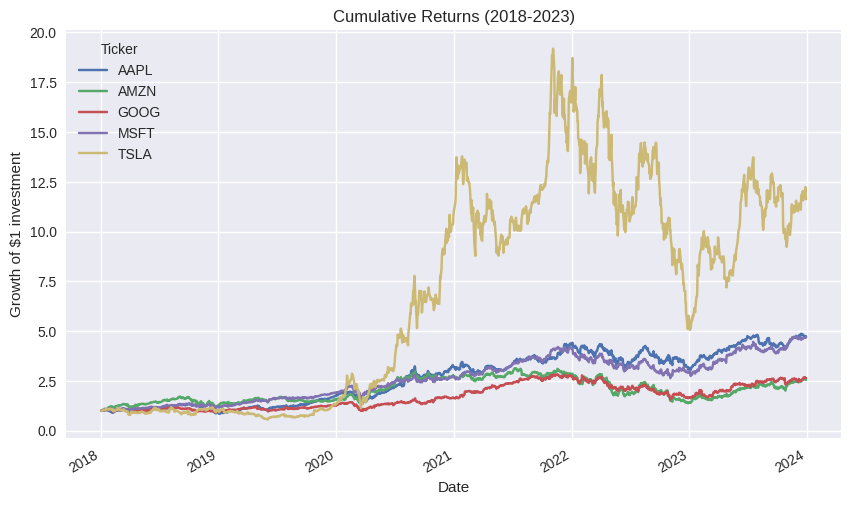

In [4]:
# 4. Rendimenti cumulati
cumulative_returns = (1 + returns).cumprod()

cumulative_returns.plot(figsize=(10,6))
plt.title("Cumulative Returns (2018-2023)")
plt.ylabel("Growth of $1 investment")
plt.show()


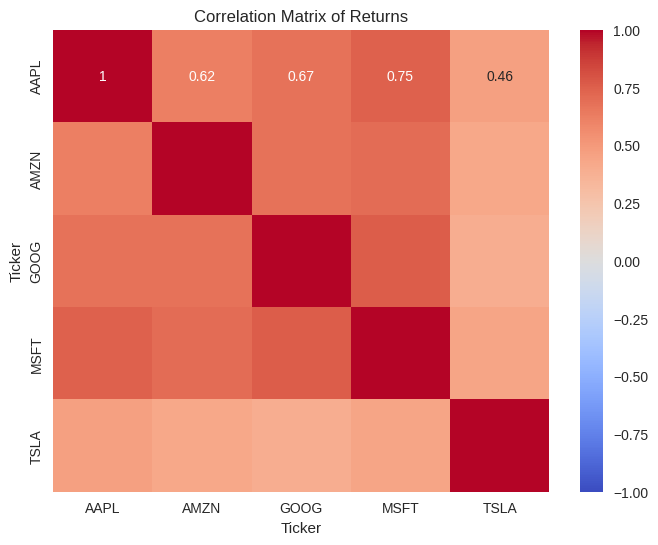

In [5]:
# 5. Correlazioni tra asset
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Returns")
plt.show()


CRESCITA MAGGIORE:
il titolo con la cresctia maggiore è Tesla, specialmente da circa giugno 2020 ha avuto un forte cambiamento nel valore.
VOLATILITÀ MAGGIORE: 
Non a caso il titolo con maggiore volatitlità anche é rappresentato da tesla, con un indice doppio rispetto a tutti gli altri titoli analizzati che si aggirano nei valori compresi tra 0.30 e 0.35. 
Interessante notare come Apple e Microsoft siano molto simili come andamento nel tempo e volatilità.
CORRELAZIONE: 
È importante costruire la matrice di correlazione per osservare come la heatmap evidenzi correlazioni che possono sfuggire. 
Il colore rosso acceso rappresenta una forte correlazione tra due titoli (sulla diagonale principale ogni titolo è correlato con se stesso),
l'importanza della consapevolezza della correlazione tra due titoli rappresenta il gap tra il rischio che si pensa che un portafoglio abbia e quello effettivo. Infatti se due titoli sono molto correlati e uno crolla il rischio del portafoglio effettivo non coincide con quello calcolato. Ne è un esempio la coppia Apple e Microsoft, carattereizzati da una correlazione pari a 0.75, notevolmente forte. 
Da qui nasce la strategia di introdurre anche titoli correlati negativamente(colore blu non presente nelle heatmap visualizzata) per attenuare le perdite  e aumentare la diversificazione, concetto molto utile amche per l'applicazione della teoria dell'efficeint frontier. 


